In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import LabelEncoder
from math import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from tqdm.auto import tqdm

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
mirrored_strategy = tf.distribute.MirroredStrategy()

Num GPUs Available:  1
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [97]:
df = pd.read_csv('home-credit-default-risk//application_train.csv')

# visualisation data

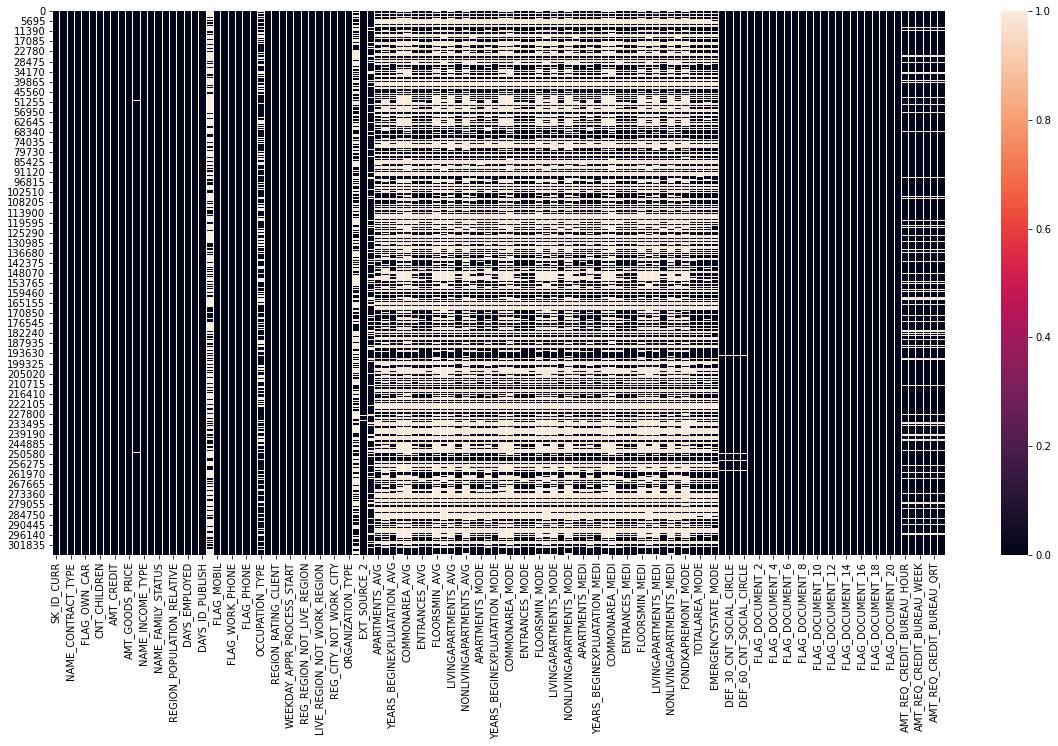

In [253]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

## valeur vide ou null 

In [254]:
(df.isna().sum()/df.shape[0]).sort_values()

SK_ID_CURR                      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5 

In [255]:
#on suppr toutes les colonnes à plus de 90% de val manquante
df = df[df.columns[(df.isna().sum()/df.shape[0]) < 0.9]]

# Variables du csv

In [256]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: Runt

<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
<ipython-input-257-e763820127aa>:3: Runt

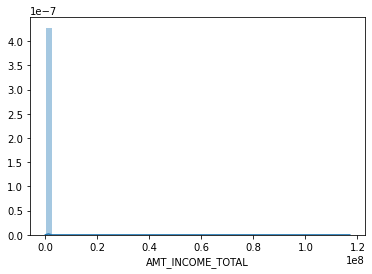

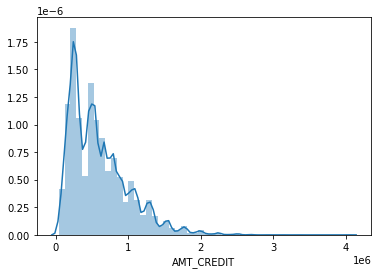

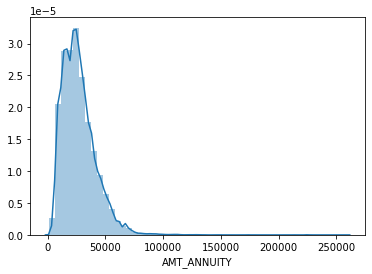

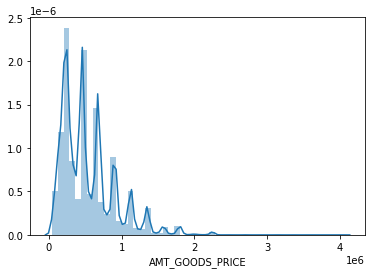

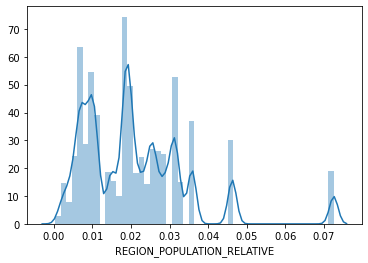

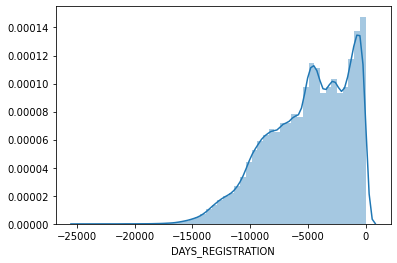

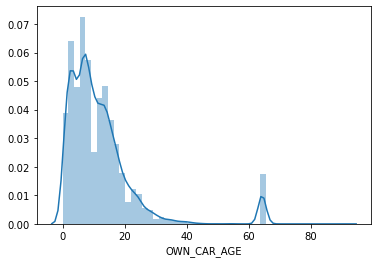

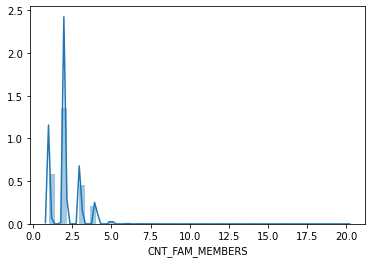

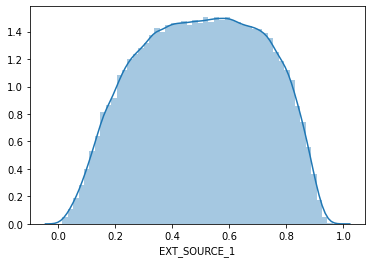

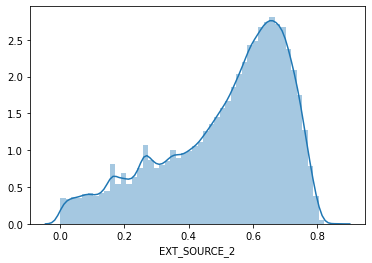

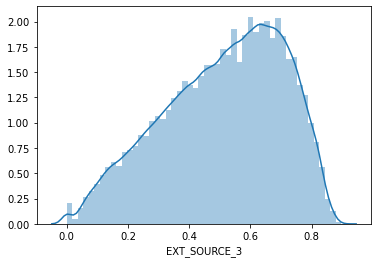

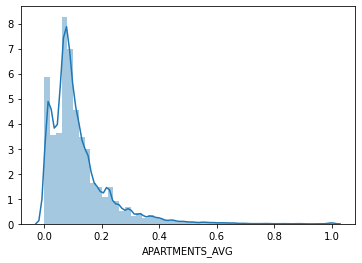

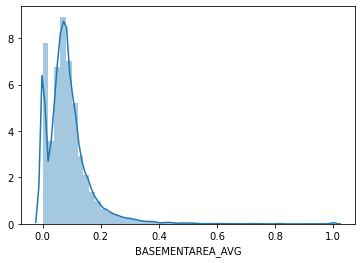

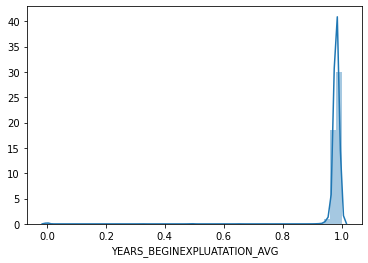

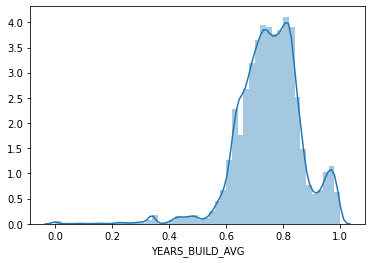

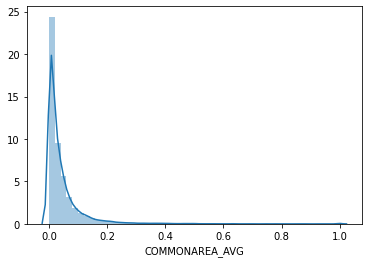

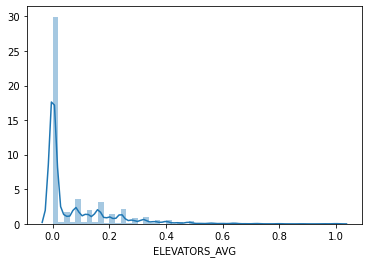

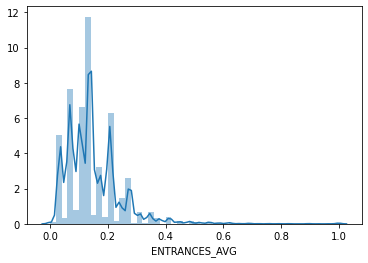

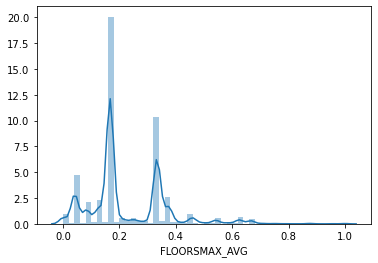

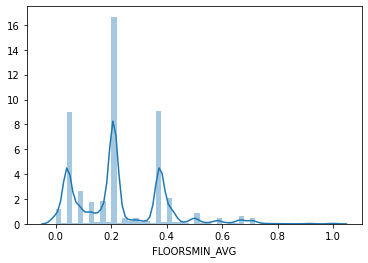

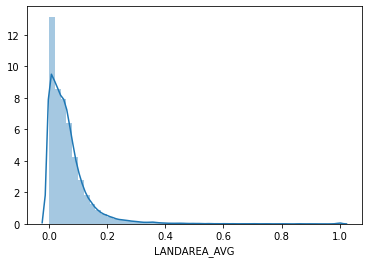

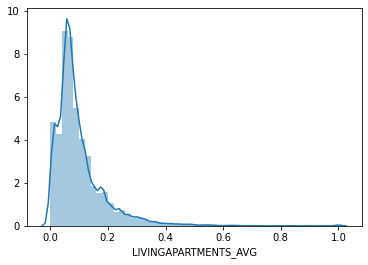

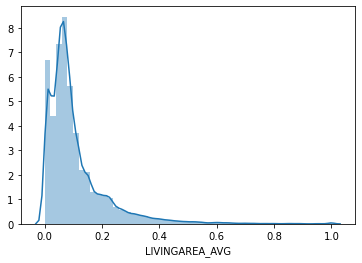

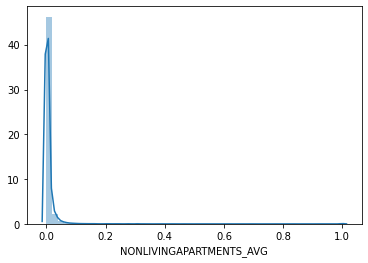

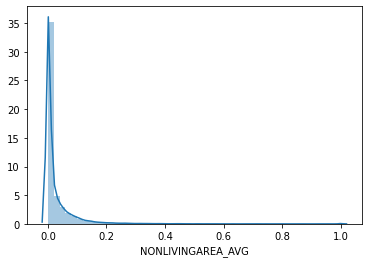

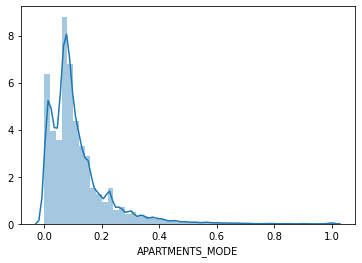

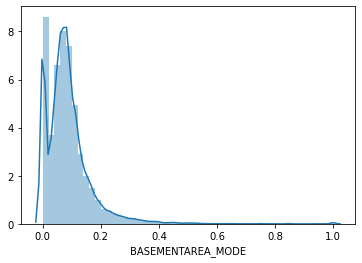

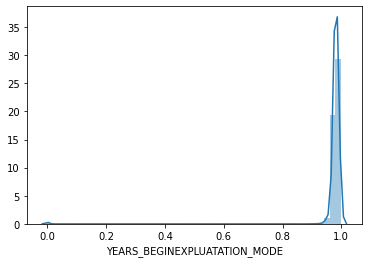

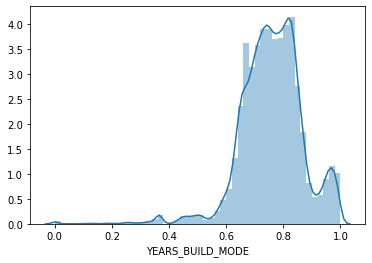

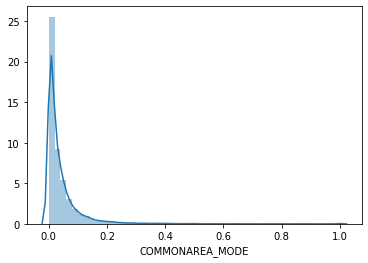

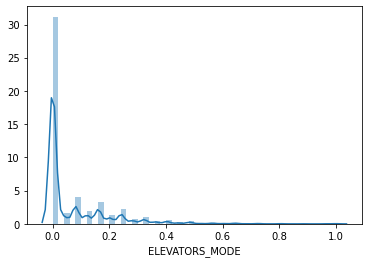

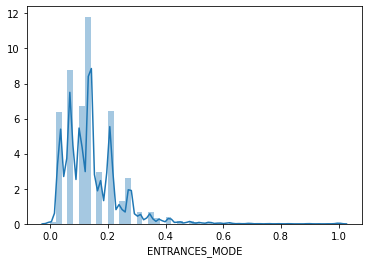

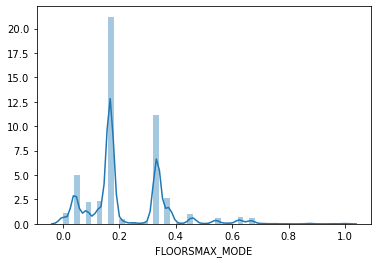

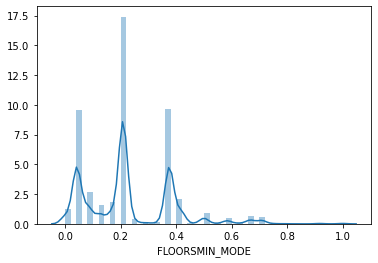

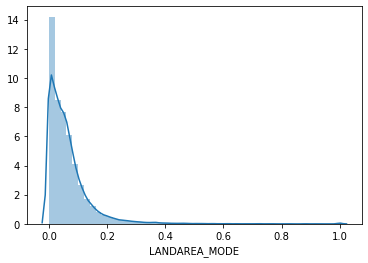

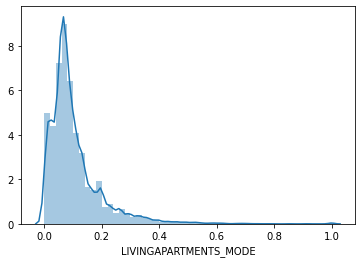

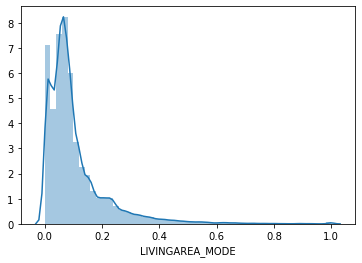

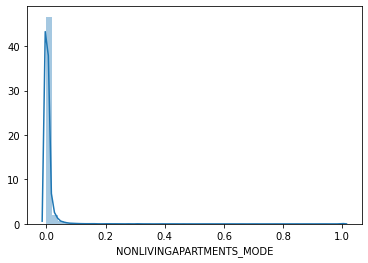

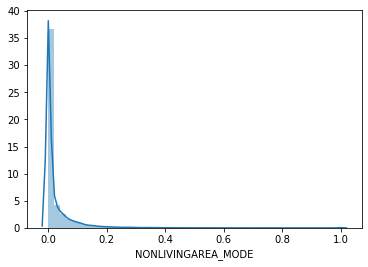

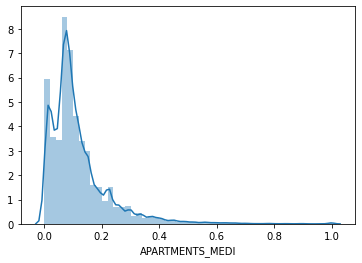

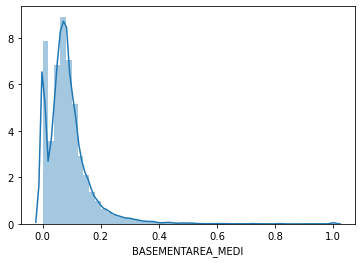

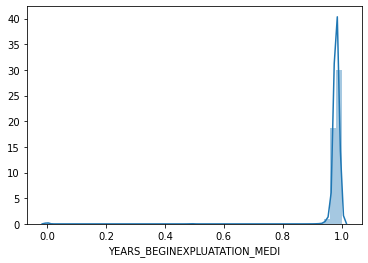

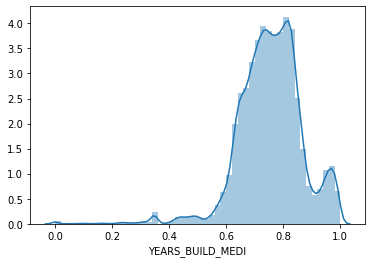

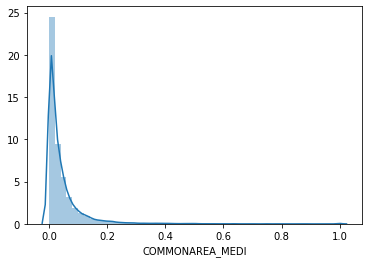

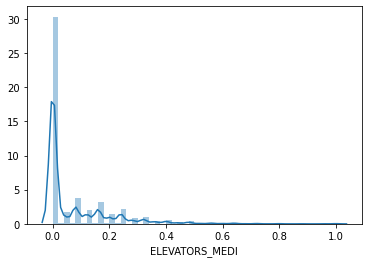

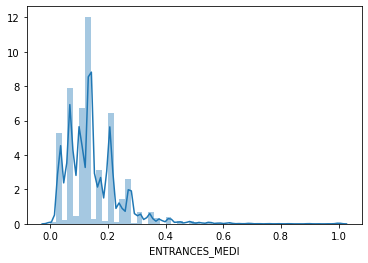

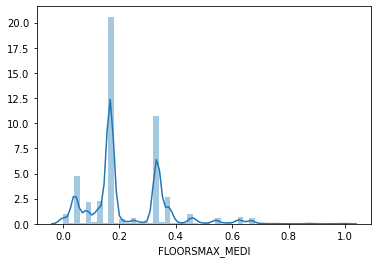

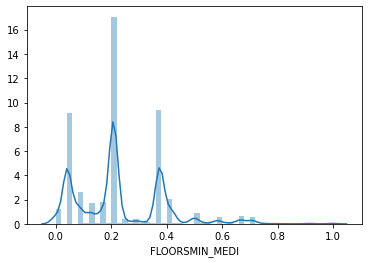

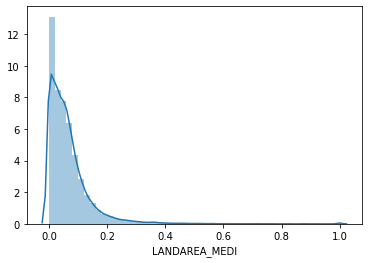

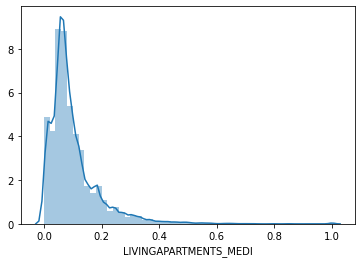

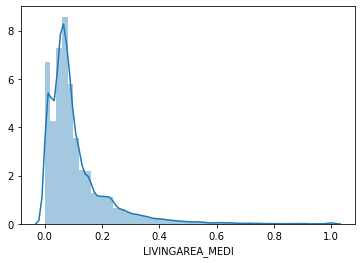

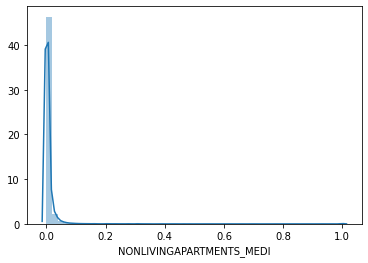

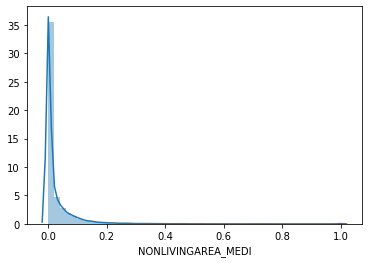

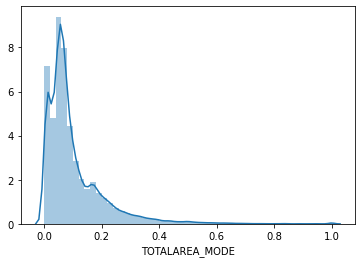

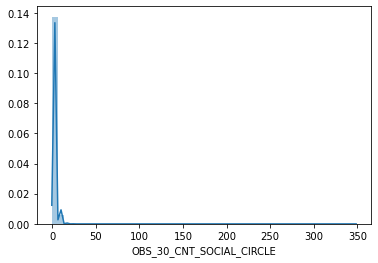

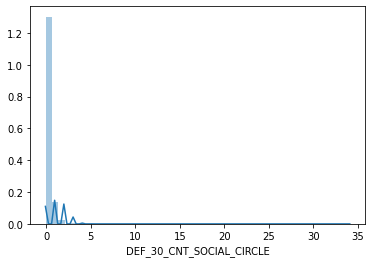

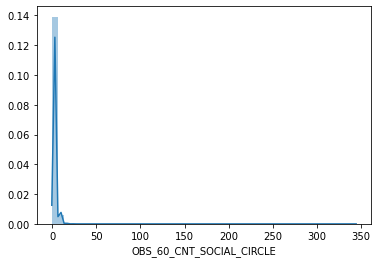

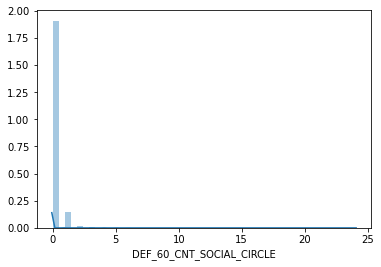

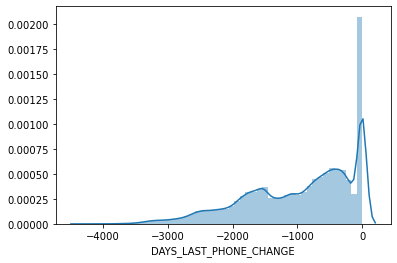

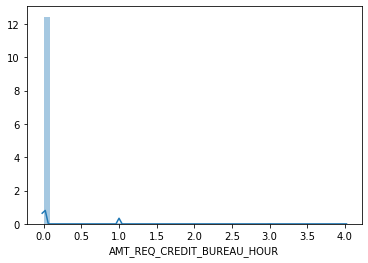

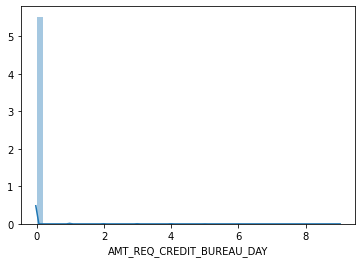

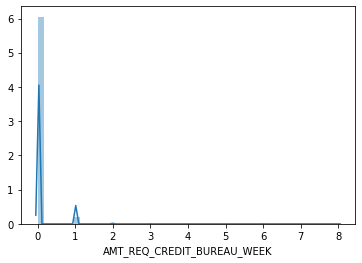

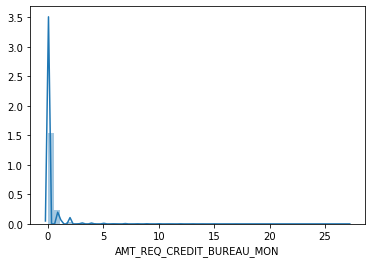

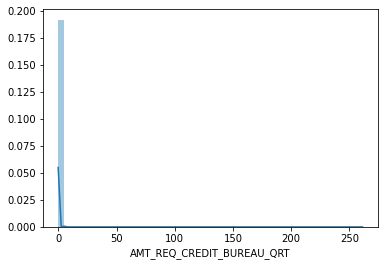

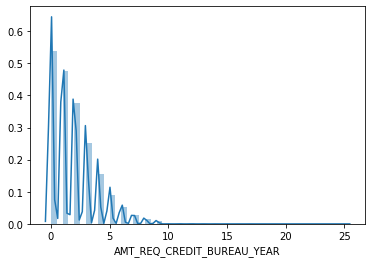

In [257]:
pbar = tqdm(total=1)
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])
    pbar.update(1/len(df.select_dtypes('float')))
pbar.close()

NAME_CONTRACT_TYPE---------------------- => ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- => ['M' 'F' 'XNA']
FLAG_OWN_CAR---------------------------- => ['N' 'Y']
FLAG_OWN_REALTY------------------------- => ['Y' 'N']
NAME_TYPE_SUITE------------------------- => ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE------------------------ => ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE--------------------- => ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS---------------------- => ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE----------------------- => ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATI

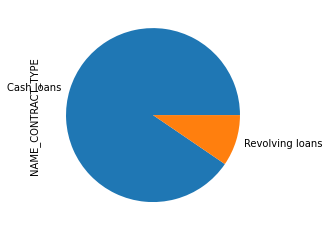

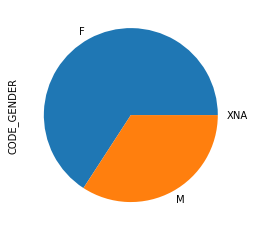

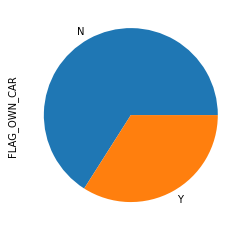

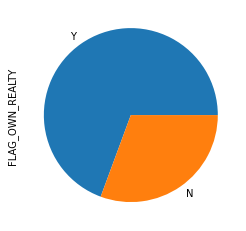

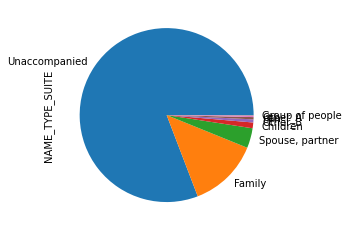

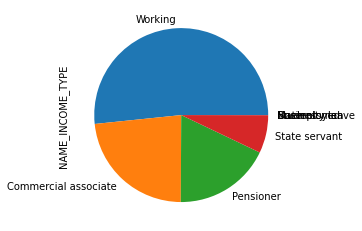

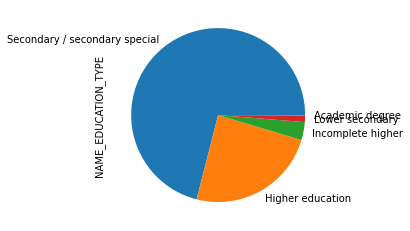

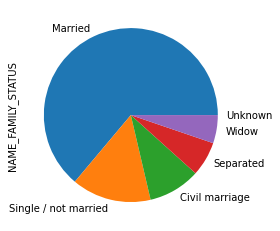

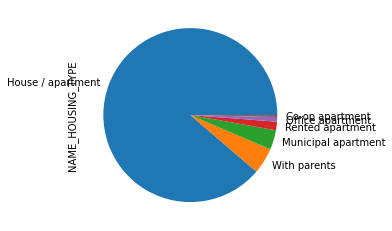

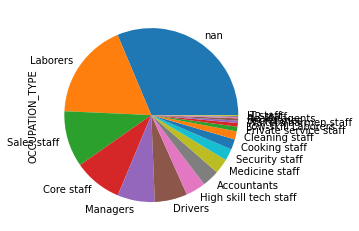

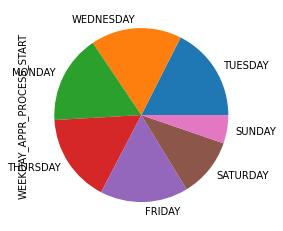

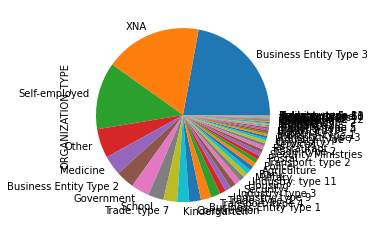

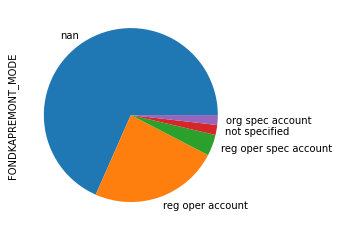

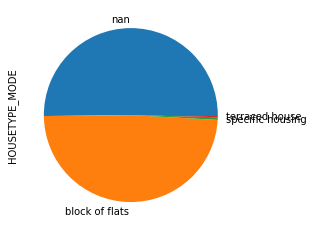

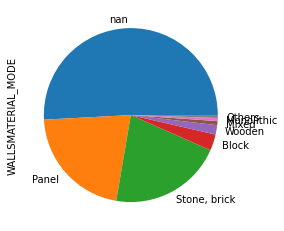

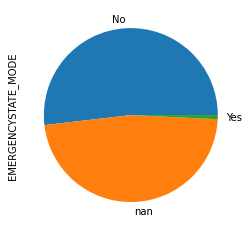

In [258]:
pbar = tqdm(total=1)
for col in df.select_dtypes('object'):
    print(f'{col :-<40} => {df[col].unique()}')
    plt.figure()
    df[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(df.select_dtypes('object')))
pbar.close()

# encoder des 16 colonnes objects

In [259]:
#df2 = pd.get_dummies(df)

In [98]:
le = []
for i,col in enumerate(df.select_dtypes('object').columns):
    try:
        le.append(LabelEncoder())
        df[col] = le[i].fit_transform(df[col].astype(str))
    except:
        print('error : '+col)

In [ ]:
#le1 = LabelEncoder()
#le2 = LabelEncoder()

In [ ]:
#df['EMERGENCYSTATE_MODE_1'] = df['EMERGENCYSTATE_MODE'].astype(str)

In [ ]:
#le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])

In [ ]:
#le2.fit_transform(df['ORGANIZATION_TYPE'])

In [ ]:
#le1.classes_

In [ ]:
#le2.classes_

In [ ]:
#df['EMERGENCYSTATE_MODE_1'] = le1.fit_transform(df['EMERGENCYSTATE_MODE_1'])
#df['ORGANIZATION_TYPE_1'] = le2.fit_transform(df['ORGANIZATION_TYPE'])

# difference entre positif et negatif

In [ ]:
#df['TARGET']

In [6]:
df.dtypes.value_counts()

float64    65
int64      41
int32      16
dtype: int64

In [7]:
positif = df[df['TARGET'] == 1 ]
negatif = df[df['TARGET'] != 1 ]

In [8]:
df_int32_columns = df.select_dtypes('int32').columns
df_int64_columns = df.select_dtypes('int64').columns
df_float_columns = df.select_dtypes('float').columns

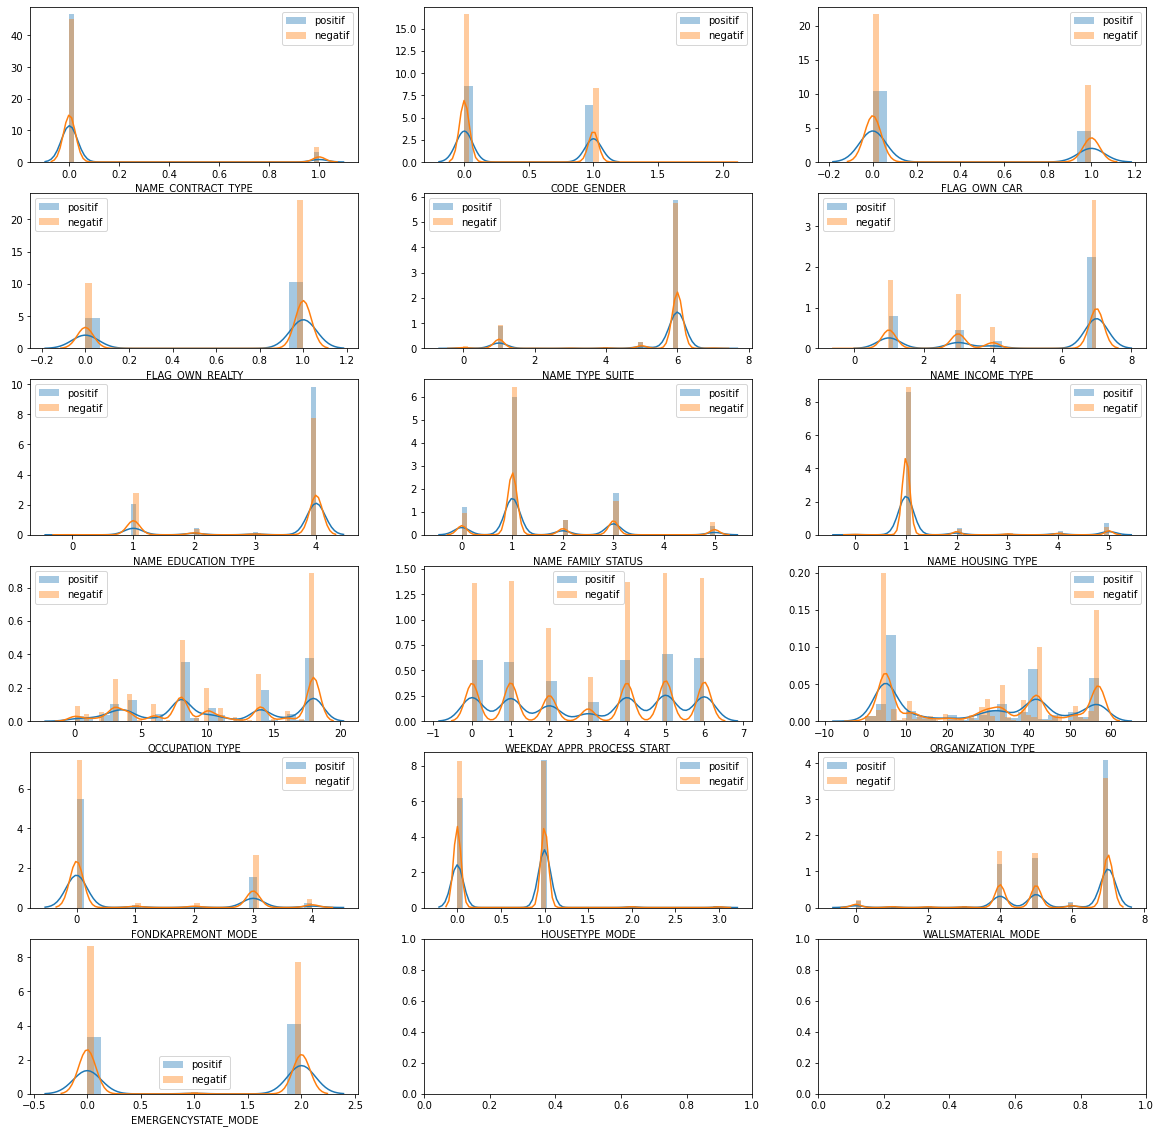

In [267]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int32_columns)/nbr), nbr,  figsize=(20, 20))
for col in (df_int32_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int32_columns))
pbar.close()

C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\donovan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to comp

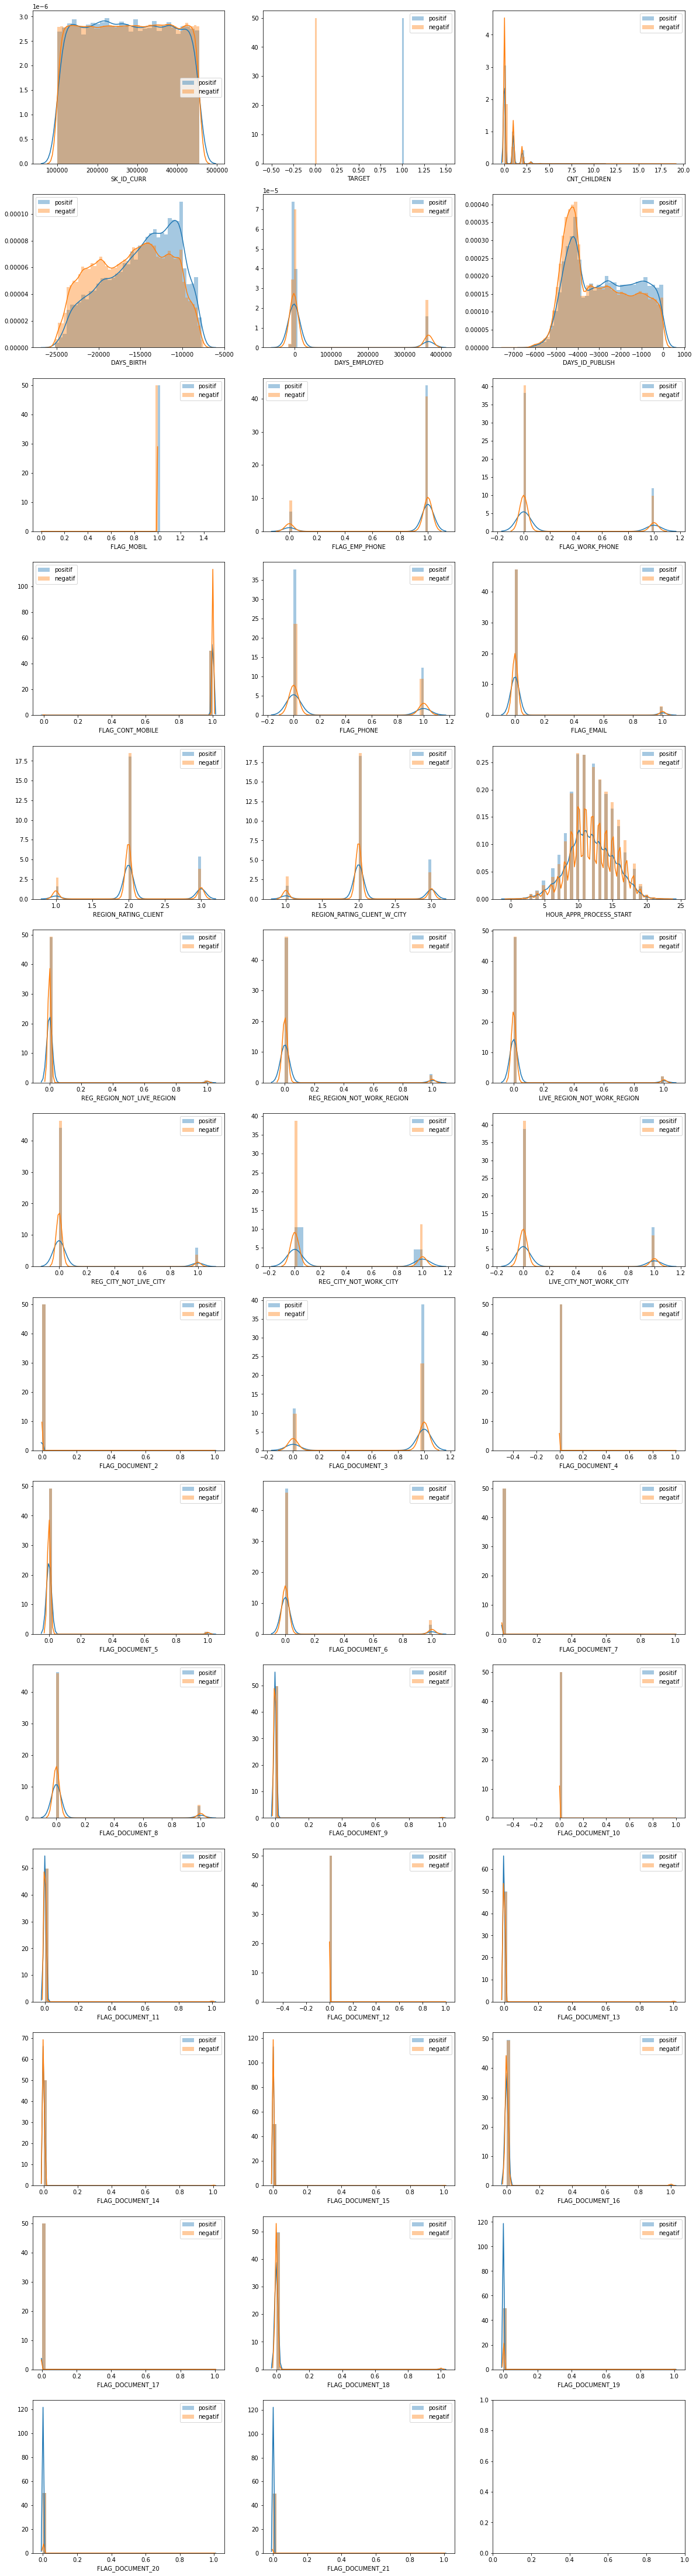

In [268]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_int64_columns)/nbr), nbr,  figsize=(20, 80))
for col in (df_int64_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_int64_columns))
pbar.close()

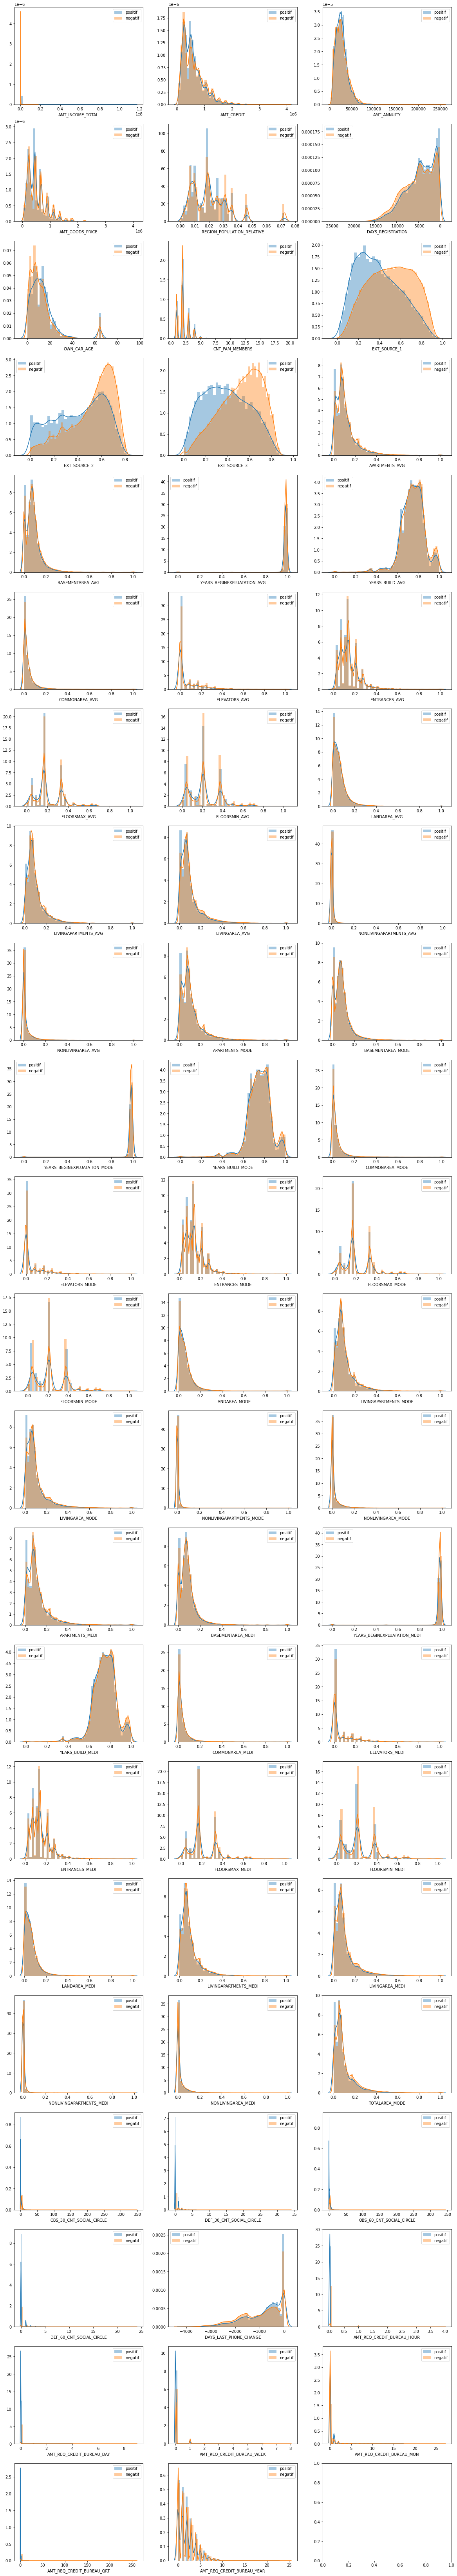

In [269]:
pbar = tqdm(total=1)
x=0
y=0
nbr = 3
fig, axs = plt.subplots(ceil(len(df_float_columns)/nbr), nbr,  figsize=(20, 120))
for col in (df_float_columns):
    if(x>=nbr):
        x=0
        y+=1
    sns.distplot(positif[col], label='positif', ax=axs[y,x])
    sns.distplot(negatif[col], label='negatif', ax=axs[y,x])
    axs[y,x].legend()
    x+=1
    pbar.update(1/len(df_float_columns))
pbar.close()

# nouveau dataTrain

In [99]:
data_train = df[['EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE','DAYS_BIRTH','DAYS_ID_PUBLISH','FLAG_PHONE','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']]
data_train.head()

,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,FONDKAPREMONT_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,FLAG_PHONE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_QRT
0,0,0,8,6,5,1,0,1,7,4,3,-9461,-2120,1,0,1,406597.5,351000.0,0.018801,-3648.0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0
1,0,0,3,1,39,0,0,0,4,1,3,-16765,-291,1,0,1,1293502.5,1129500.0,0.003541,-1186.0,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1,8,1,11,1,1,1,7,4,0,-19046,-2531,1,0,0,135000.0,135000.0,0.010032,-4260.0,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,8,6,5,0,0,1,7,4,0,-19005,-2437,0,0,1,312682.5,297000.0,0.008019,-9833.0,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,NaN,NaN,NaN
4,2,1,3,4,37,1,0,1,7,4,0,-19932,-3458,0,1,0,513000.0,513000.0,0.028663,-4311.0,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
(data_train.isna().mean()).sort_values()

EMERGENCYSTATE_MODE           0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_PHONE                    0.000000
DAYS_ID_PUBLISH               0.000000
DAYS_BIRTH                    0.000000
FONDKAPREMONT_MODE            0.000000
REG_CITY_NOT_WORK_CITY        0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
OCCUPATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
HOUSETYPE_MODE                0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
AMT_GOODS_PRICE               0.000904
EXT_SOURCE_2                  0.002146
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE      0.003320
AMT_REQ_CREDIT_BUREAU_HOU

In [92]:
data_train['EMERGENCYSTATE_MODE'].isna().sum()

0

In [ ]:
pbar = tqdm(total=1)
for col in data_train.columns:
    if((data_train[col].isna().sum()) > 0):
        print(f'{col :-<40} => {data_train[col].unique()}')
        plt.figure()
        data_train[col].value_counts(normalize=True, dropna=False).plot.pie()
    pbar.update(1/len(data_train.columns))
pbar.close()

# normalisation de la data

# valeurs vide 

In [32]:
imputer = KNNImputer(n_neighbors=2)

In [83]:
lol = imputer.fit_transform([data_train['EXT_SOURCE_2']])[0]

In [117]:
columns = (data_train.isna().mean()).sort_values() >0
columns_index = columns.index[columns.values == True]

imputer = KNNImputer(n_neighbors= 2)


# imputer = KNNImputer(n_neighbors=5)
# df = data_train(imputer.fit_transform(data_train),columns = data_train.columns)
# df.isna().any()

# print(columns_index)

pbar = tqdm(total=1)
for column in columns_index:
    
    impute_with_2 = imputer.fit_transform([data_train[column]])[0]
#     print(impute_with_2[0:5])
#     print(data_train[column].head())
    
    print("Colonne : "+ column + " -- taille KNN : "+str(len(impute_with_2)) + " -- taille colonne: "+str(len(data_train[column])))
    
#     nulls = data_train[data_train[column].isna()]

#     for i, ni in enumerate(nulls.index[:len(impute_with_2)]):
#         data_train[column].loc[ni] = impute_with_2[i]

    pbar.update(1/(len(columns_index)))
pbar.close()


# data_train.head()

[ 351000. 1129500.  135000.  297000.  513000.]
0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64
Colonne : AMT_GOODS_PRICE -- taille KNN : 307233 -- taille colonne: 307511
[0.26294859 0.62224578 0.55591208 0.65044169 0.32273829]
0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64
Colonne : EXT_SOURCE_2 -- taille KNN : 306851 -- taille colonne: 307511
[2. 1. 0. 2. 0.]
0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
Colonne : OBS_60_CNT_SOCIAL_CIRCLE -- taille KNN : 306490 -- taille colonne: 307511
[2. 0. 0. 0. 0.]
0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
Colonne : DEF_30_CNT_SOCIAL_CIRCLE -- taille KNN : 306490 -- taille colonne: 307511
[2. 1. 0. 2. 0.]
0    2.0
1    1.0
2    0.0
3    2.0
4    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64
Colonne : OBS_30_CNT_SOCIAL_CIRCLE -

In [102]:
(data_train.isna().mean()).sort_values()

EMERGENCYSTATE_MODE           0.000000
DAYS_REGISTRATION             0.000000
REGION_POPULATION_RELATIVE    0.000000
AMT_CREDIT                    0.000000
FLAG_DOCUMENT_3               0.000000
FLAG_PHONE                    0.000000
DAYS_ID_PUBLISH               0.000000
DAYS_BIRTH                    0.000000
FONDKAPREMONT_MODE            0.000000
REG_CITY_NOT_WORK_CITY        0.000000
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
OCCUPATION_TYPE               0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
ORGANIZATION_TYPE             0.000000
HOUSETYPE_MODE                0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
AMT_GOODS_PRICE               0.000904
EXT_SOURCE_2                  0.002146
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE      0.003320
AMT_REQ_CREDIT_BUREAU_HOU

In [47]:
# data_train['EXT_SOURCE_1'].sort_values()

In [274]:
df.shape

(307511, 122)

In [275]:
df_test = pd.read_csv('home-credit-default-risk//application_test.csv')

In [276]:
for i,col in enumerate(df_test.select_dtypes('object').columns):
    try:
        df_test[col] = le[i].transform(df_test[col].astype(str))
    except:
        print('error : '+col)

error : NAME_CONTRACT_TYPE
error : CODE_GENDER
error : FLAG_OWN_CAR
error : FLAG_OWN_REALTY
error : NAME_TYPE_SUITE
error : NAME_INCOME_TYPE
error : NAME_EDUCATION_TYPE
error : NAME_FAMILY_STATUS
error : NAME_HOUSING_TYPE
error : OCCUPATION_TYPE
error : WEEKDAY_APPR_PROCESS_START
error : ORGANIZATION_TYPE
error : FONDKAPREMONT_MODE
error : HOUSETYPE_MODE
error : WALLSMATERIAL_MODE
error : EMERGENCYSTATE_MODE


# autre

In [ ]:
test = df.groupby(['TARGET'])
test

In [ ]:
test.head()

In [ ]:
#test['CODE_GENDER'].value_counts()

In [ ]:
test['FLAG_OWN_CAR'].value_counts()

In [ ]:

x=0
y=0

# test.hist()
# test.plot()
# test.size()

# test['TARGET'].columns

# print(test.group.columns)

columns_name = []

for name, group in test:
   columns_name = group.columns


# negatif_test = test[test['TARGET'] != 1]
# positif_test = test['TARGET'] == 1


# test['TARGET'].hist()

test.hist(figsize=(25, 25))

# fig, axs = plt.subplots(ceil(len(columns_name)/4), 4,  figsize=(30, 20))
# for col in (columns_name):
#     if(x>=4):
#         x=0
#         y+=1
        
#     sns.distplot(test[col], label='positif', ax=axs[y,x])
# #     sns.distplot(positif_test[col], label='positif', ax=axs[y,x])
# #     sns.distplot(negatif_test[col], label='negatif', ax=axs[y,x])
#     axs[y,x].legend()
#     x+=1